In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load raw data
df = pd.read_csv("../data/raw/data.csv", parse_dates=["TransactionStartTime"])
df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


In [2]:
# Shape and info
print("Dataset shape:", df.shape)
print(df.info())

# Summary statistics
df.describe()


Dataset shape: (95662, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  object             
 8   ProductId             95662 non-null  object             
 9   ProductCategory       95662 non-null  object             
 10  ChannelId             95662 non-null  object             
 11  Amount                95662 non-null  fl

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [3]:
# Missing values
missing = df.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0]
print("Missing values:\n", missing)


Missing values:
 Series([], dtype: int64)


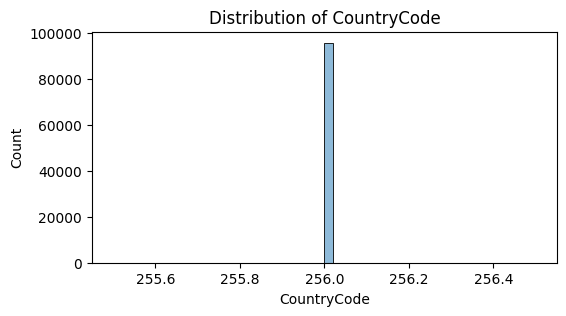

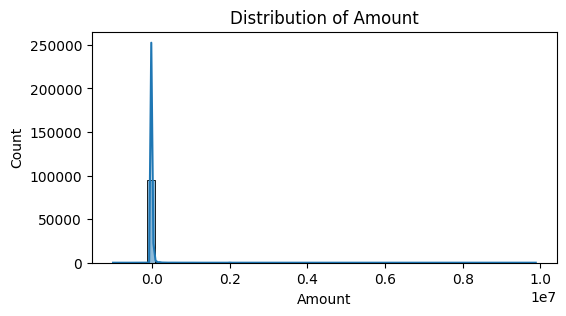

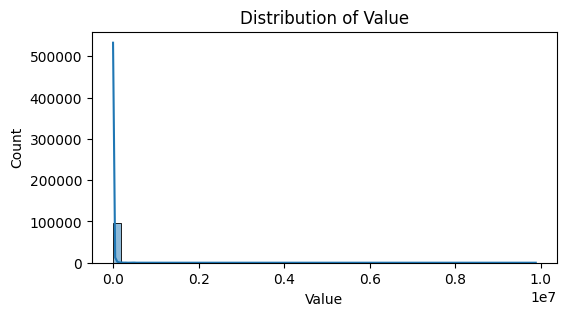

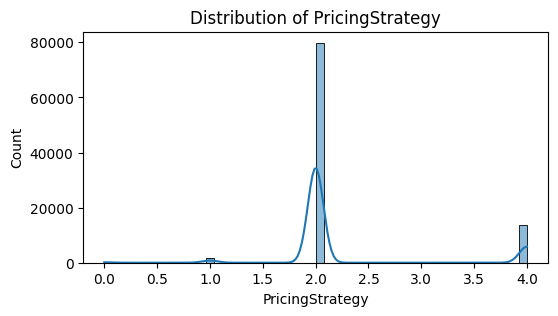

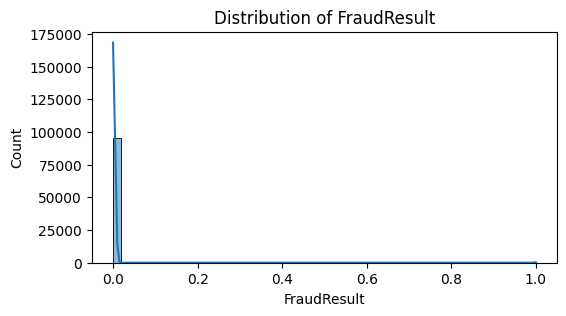

In [4]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


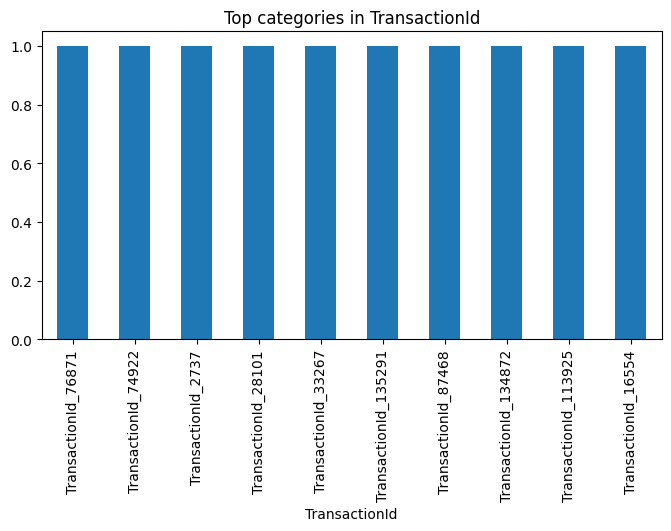

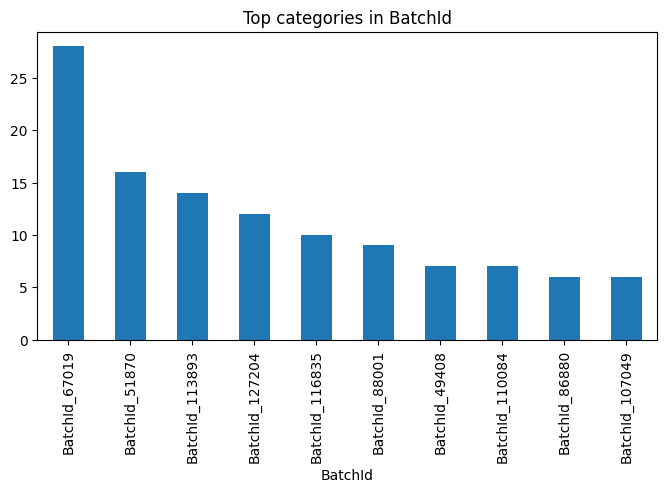

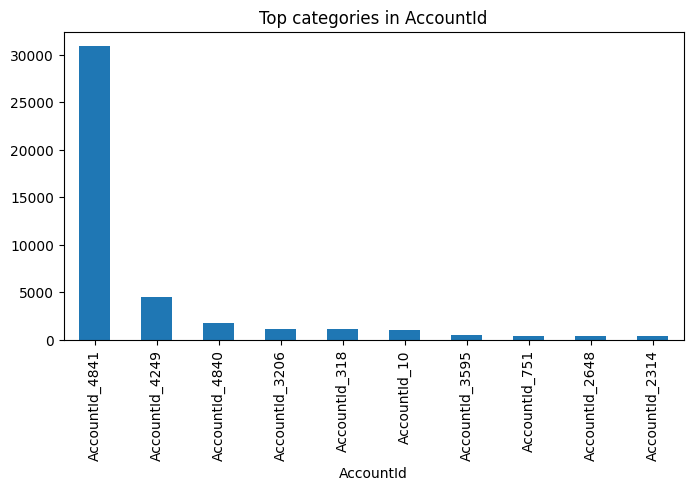

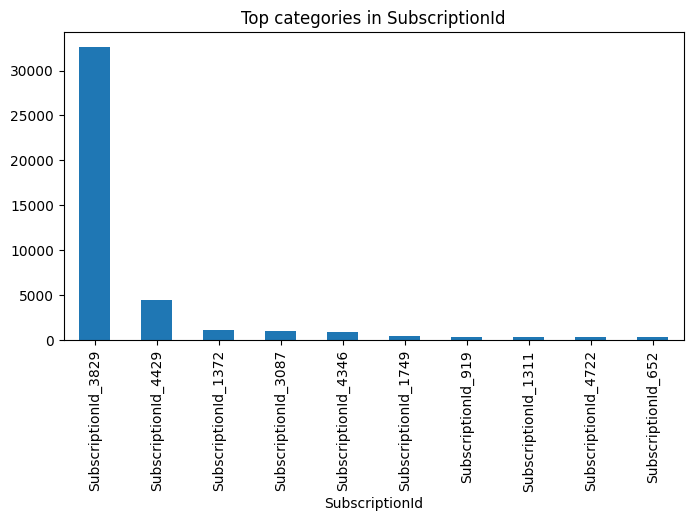

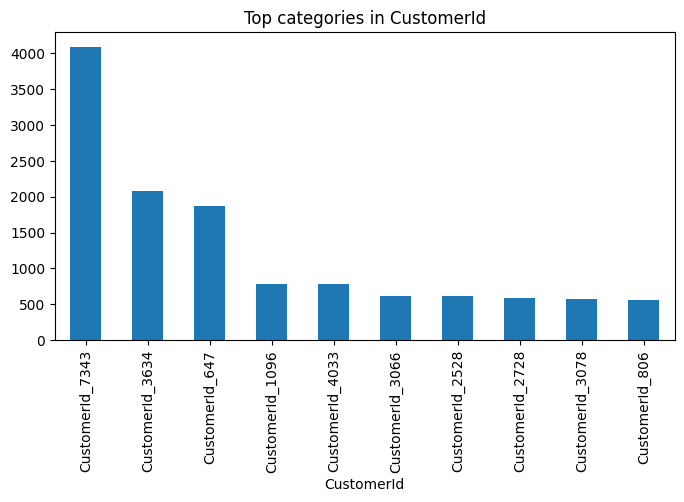

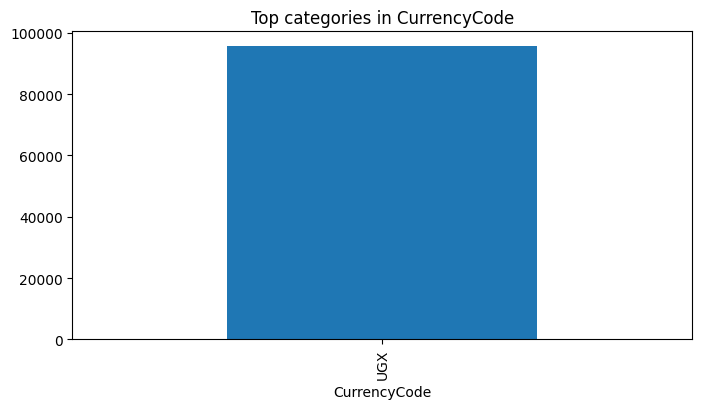

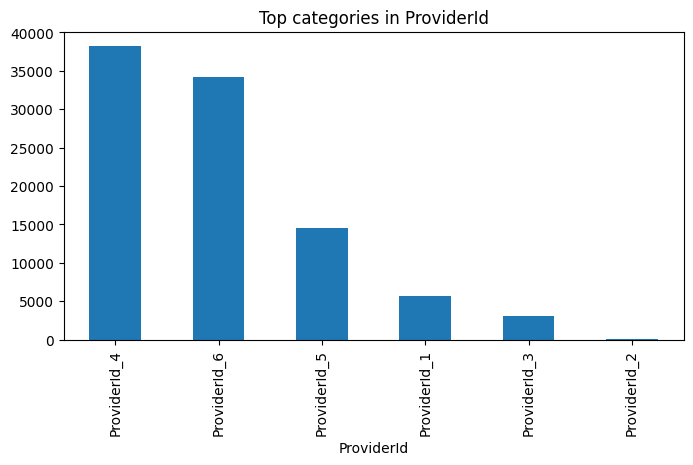

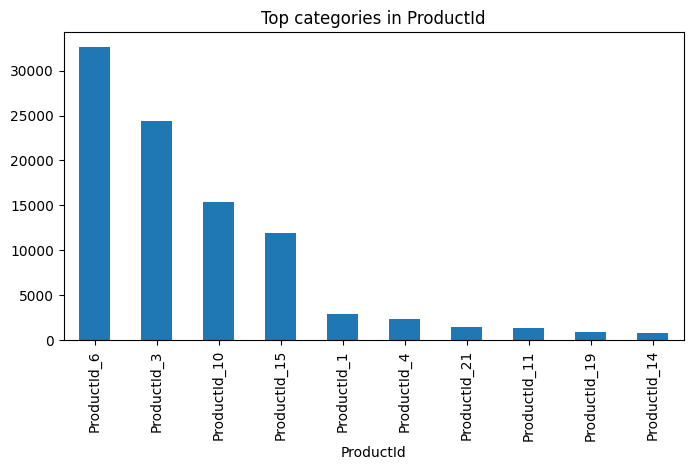

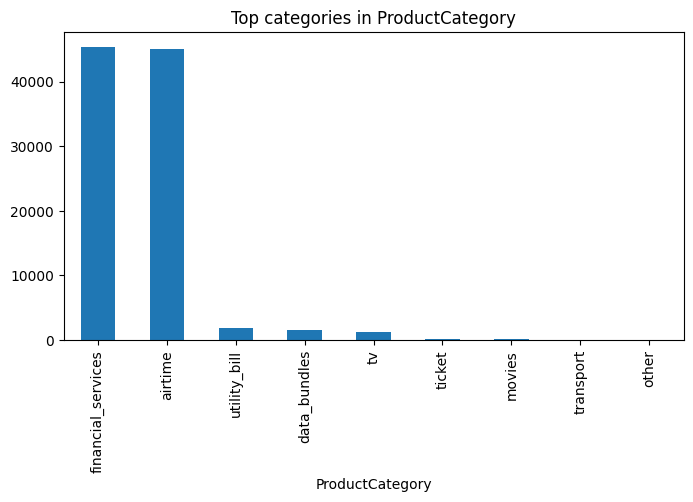

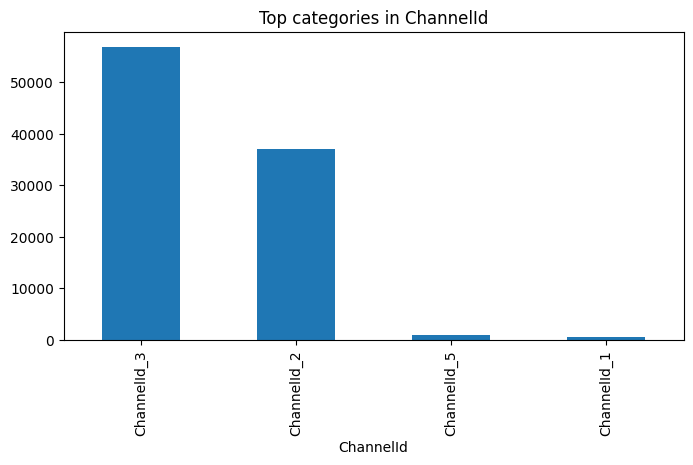

In [5]:
cat_cols = df.select_dtypes(include="object").columns.tolist()

for col in cat_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().head(10).plot(kind="bar")
    plt.title(f"Top categories in {col}")
    plt.show()


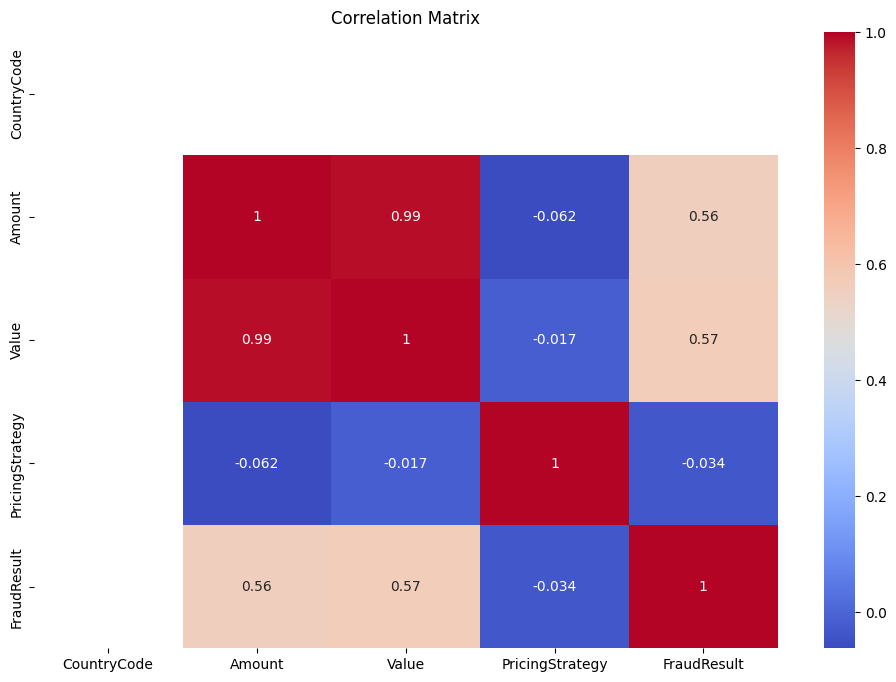

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes("number").corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


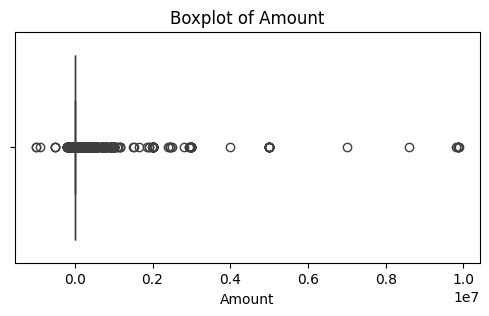

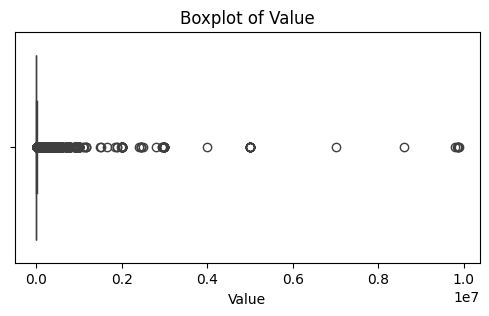

In [7]:
for col in ["Amount", "Value"]:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [8]:
key_insights = """
Transaction amounts are heavily right-skewed with extreme outliers.
A small number of product categories dominate transaction volume.
High-frequency customers show significantly higher monetary value.
Missing values are minimal and can be safely imputed.
RFM metrics are viable signals for behavioral risk segmentation.
"""


In [9]:
Conclusion = """
The EDA confirms strong behavioral signals suitable for credit risk modeling.
RFM-based features will be prioritized in feature engineering.
"""